In [8]:
import signalfloweeg 
import mne 

filepath = "/home/cbl/Desktop/Test_Data/0012_rest.set"
EEG = mne.io.read_raw_eeglab(filepath, preload=True)
filtered_eeg = signalfloweeg.preprocessing.filtering.bandpass_filter(EEG, 2, 50)



Reading /home/cbl/Desktop/Test_Data/0012_rest.fdt
Reading 0 ... 307139  =      0.000 ...   307.139 secs...


/home/cbl/mne-python/1.7.0_0/lib/python3.12/site-packages/pymatreader/utils.py:238: UserWarning: Complex objects (like classes) are not supported. They are imported on a best effort base but your mileage will vary.
  warn('Complex objects (like classes) are not supported. '


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 2 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 2.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 1.00 Hz)
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 1651 samples (1.651 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    0.6s


In [9]:
# segment_EEG = signalfloweeg.preprocessing.segment_rejection.manual_segment_rejection(filtered_eeg)
ica_EEG, ICAData = signalfloweeg.preprocessing.ica.run_ICA(filtered_eeg)
print(filtered_eeg)

Fitting ICA to data using 128 channels (please be patient, this may take a while)
Selecting by non-zero PCA components: 121 components


/home/cbl/Documents/GitHub/signalfloweeg_py/signalfloweeg/preprocessing/ica.py:21: RuntimeWarning: Using n_components=None (resulting in n_components_=121) may lead to an unstable mixing matrix estimation because the ratio between the largest (1.3e+02) and smallest (2.4e-05) variances is too large (> 1e6); consider setting n_components=0.999999 or an integer <= 77
  ica.fit(data)


Fitting ICA took 269.7s.
<RawEEGLAB | 0012_rest.fdt, 128 x 307140 (307.1 s), ~300.1 MB, data loaded>


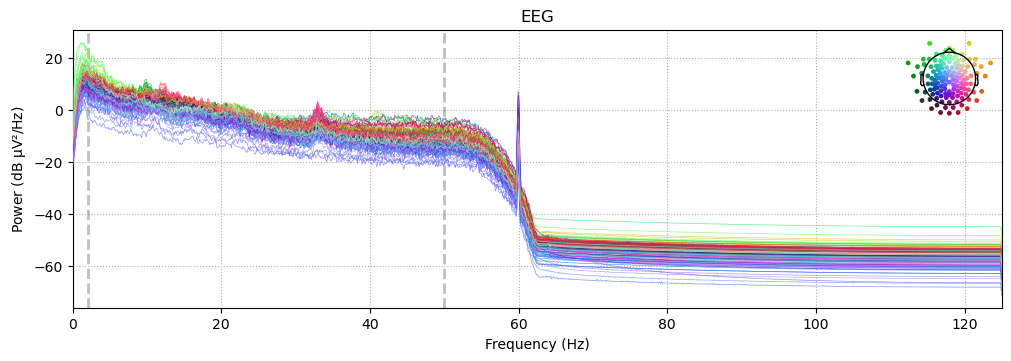

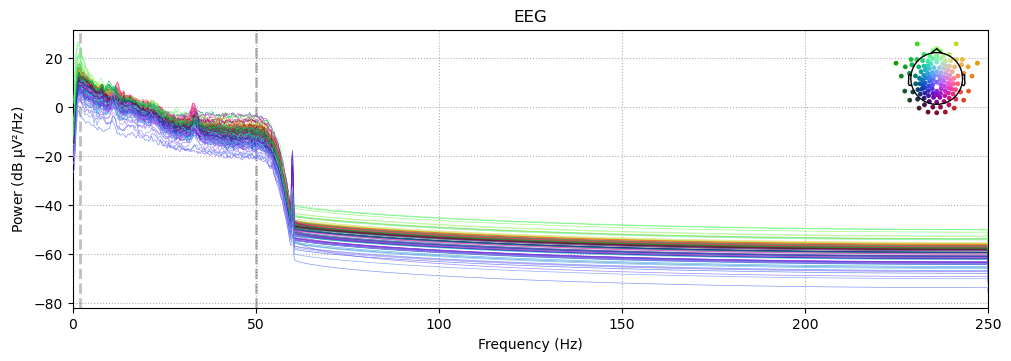

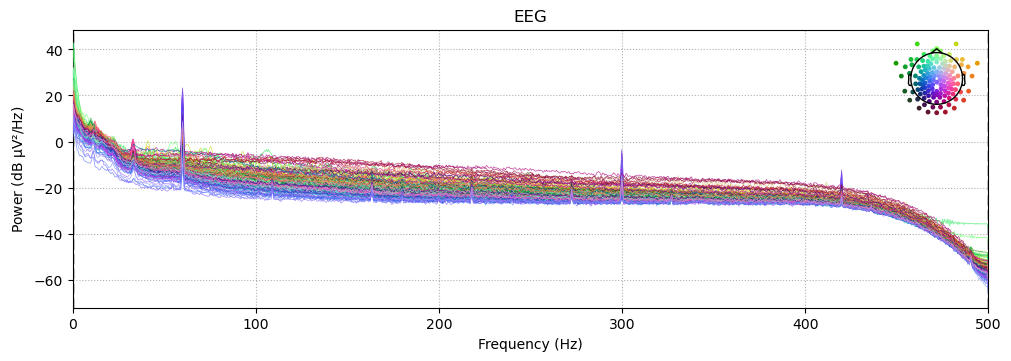

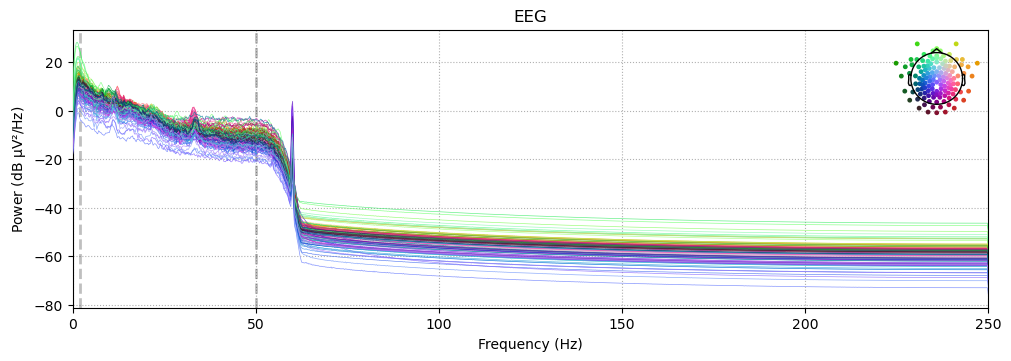

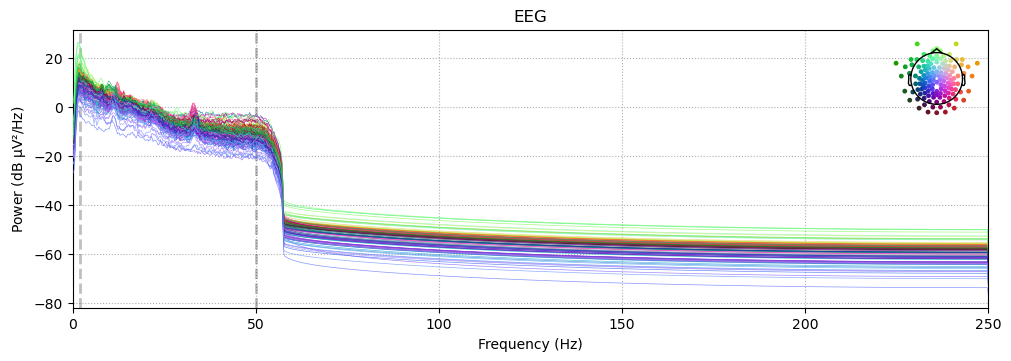

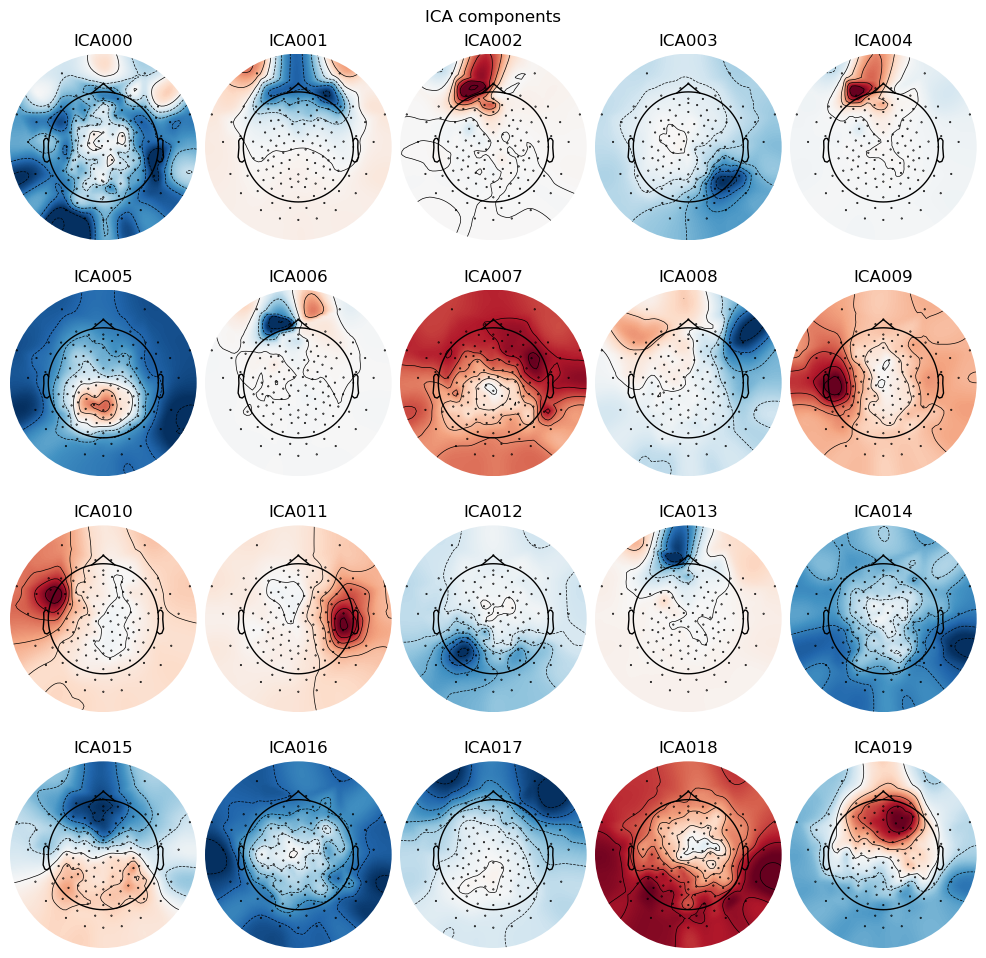

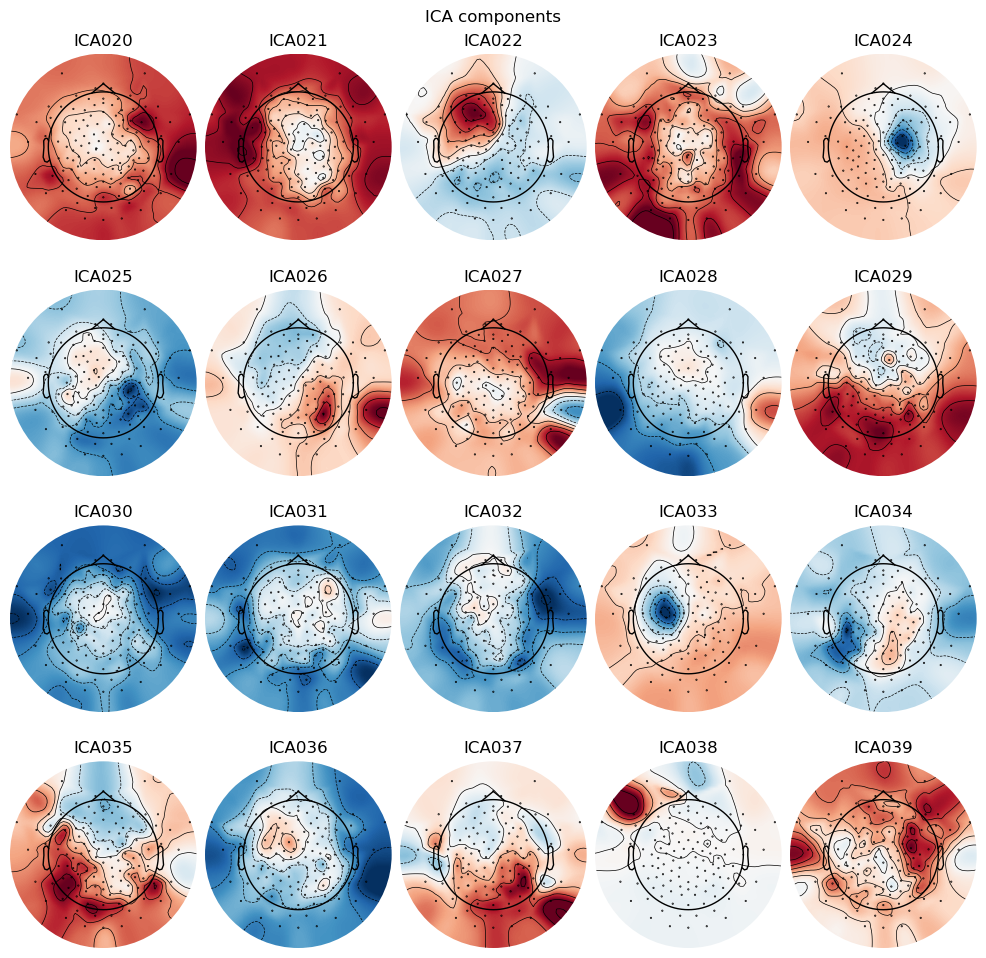

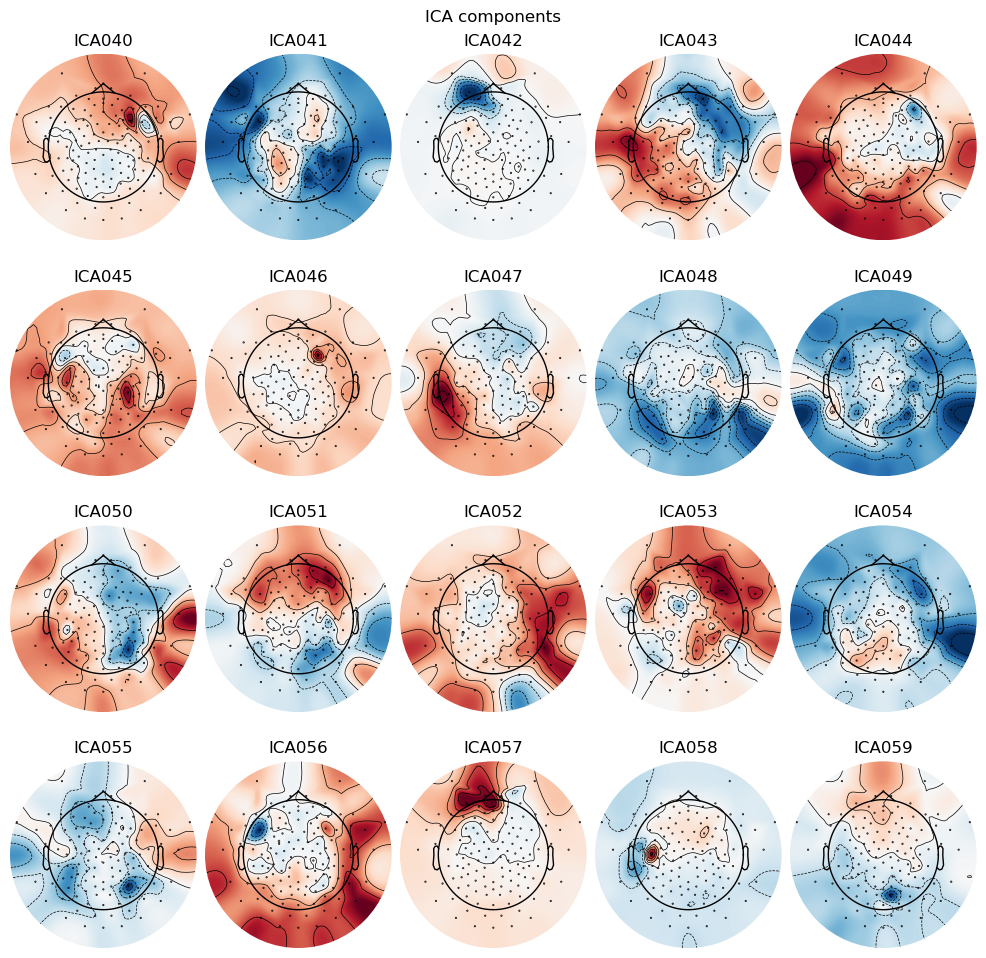

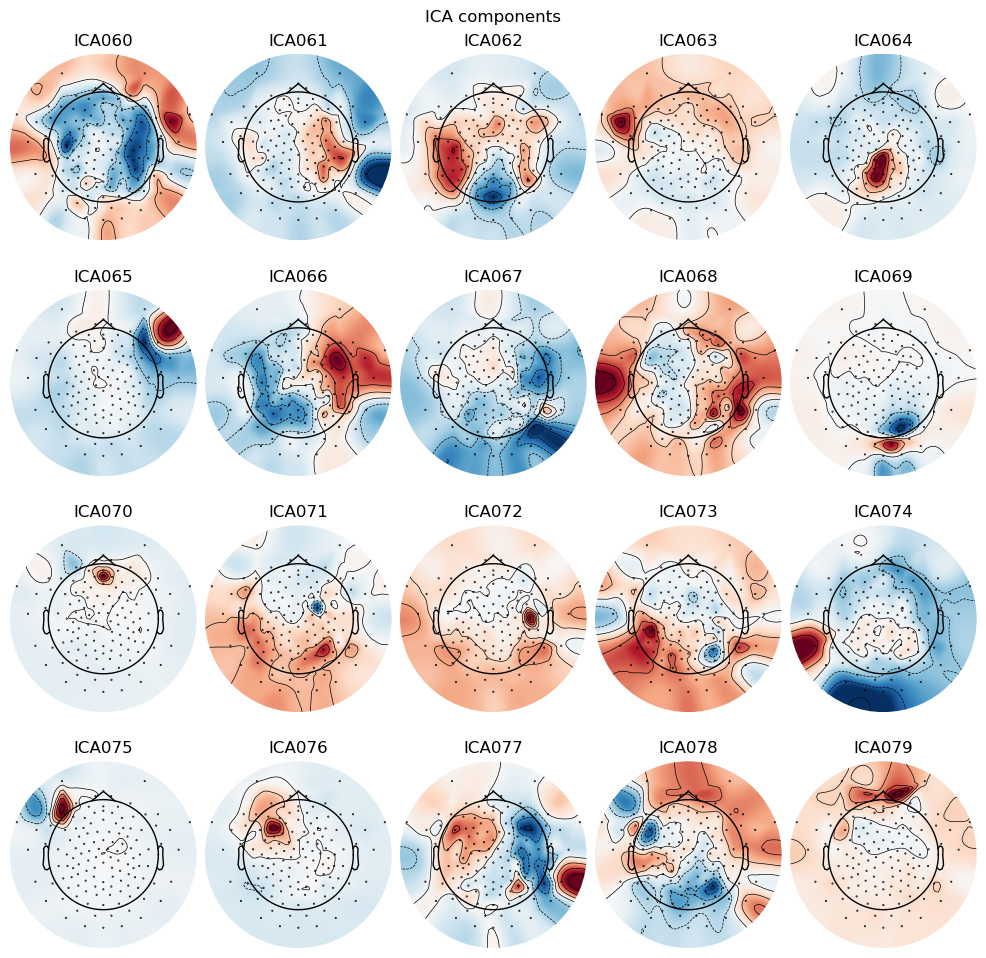

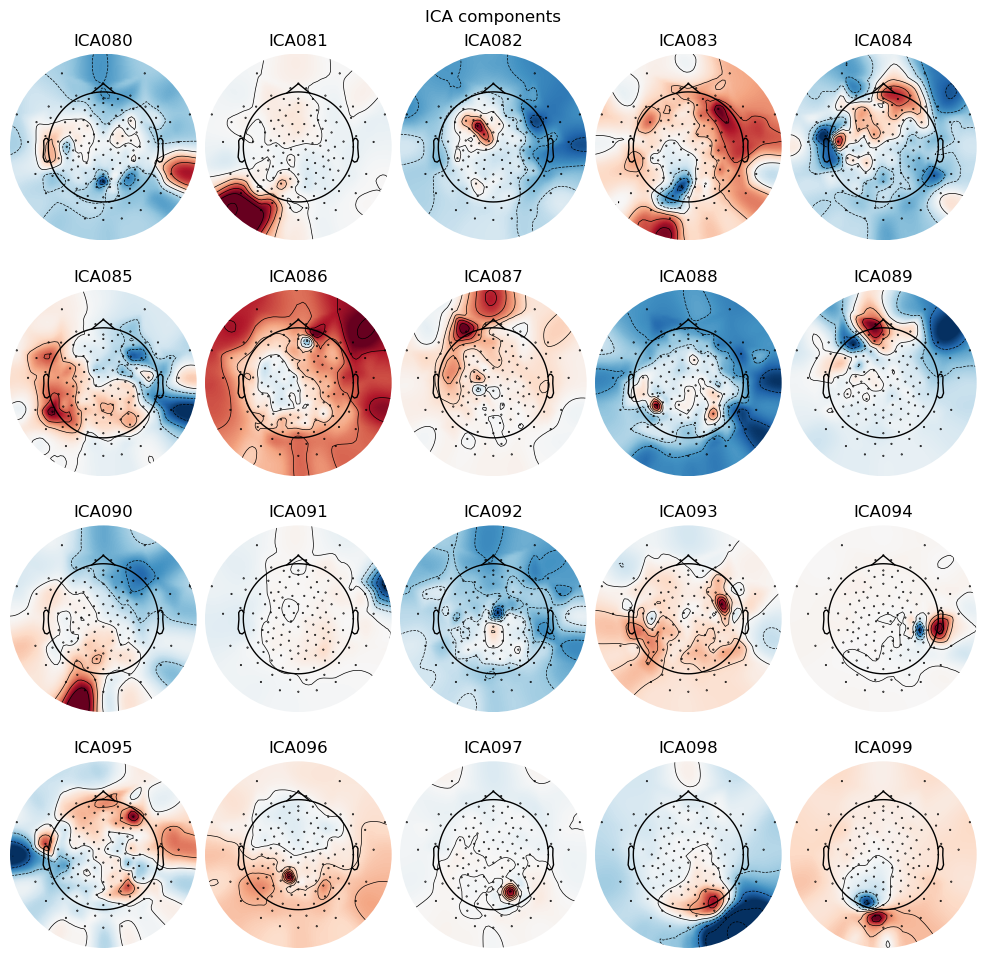

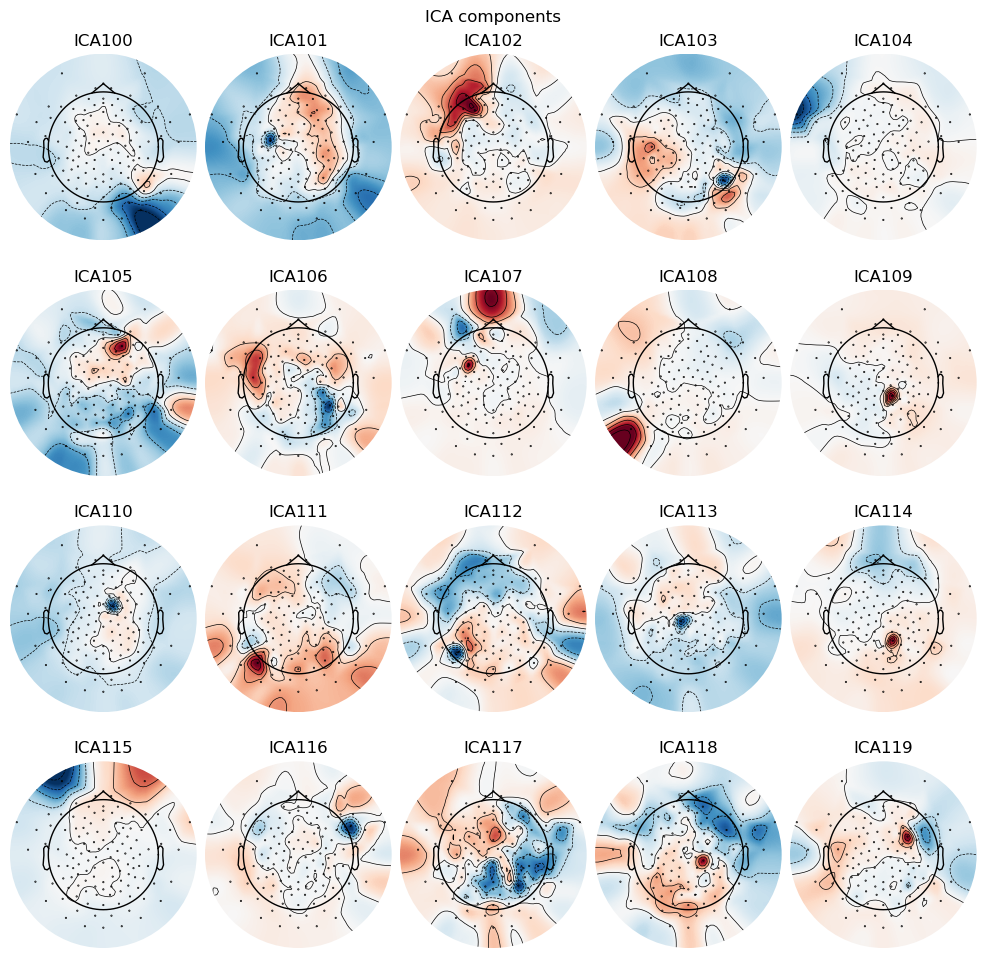

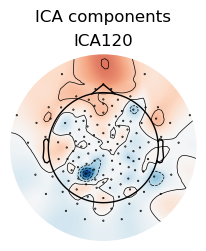

Creating RawArray with float64 data, n_channels=121, n_times=307140
    Range : 0 ... 307139 =      0.000 ...   307.139 secs
Ready.
Using qt as 2D backend.
    Using multitaper spectrum estimation with 7 DPSS windows
Not setting metadata
153 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
153 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
153 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
153 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
153 matching events found
No baseline correction applied
0 projection items activated


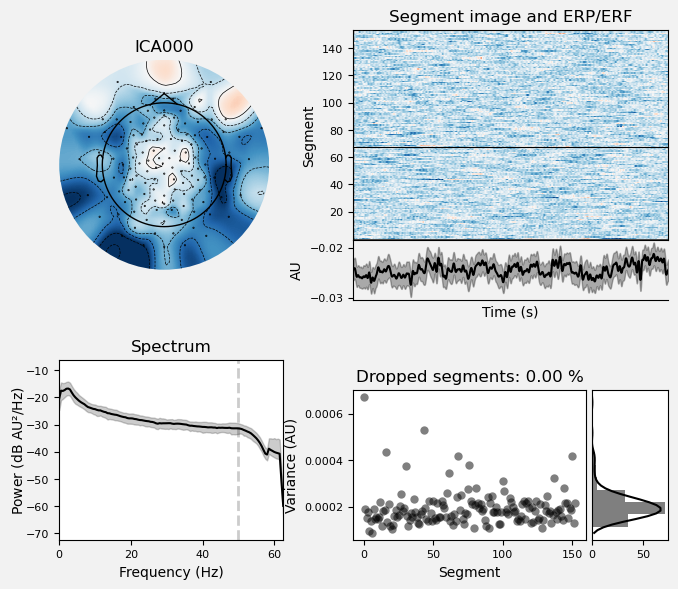

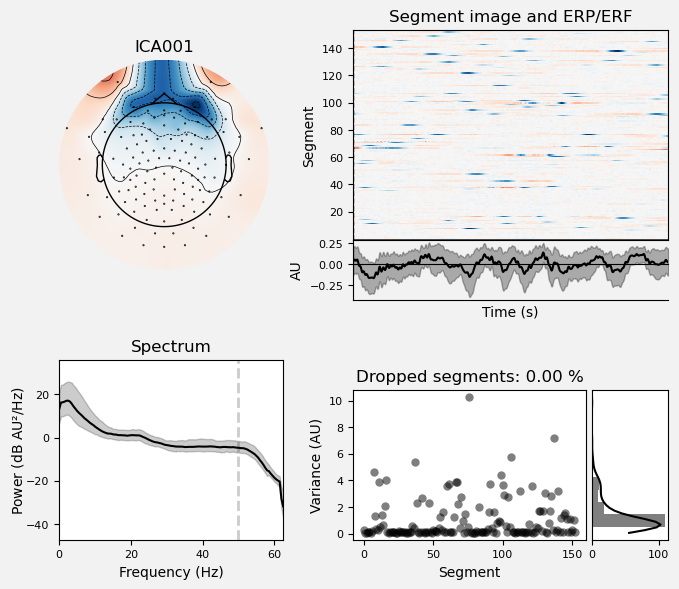

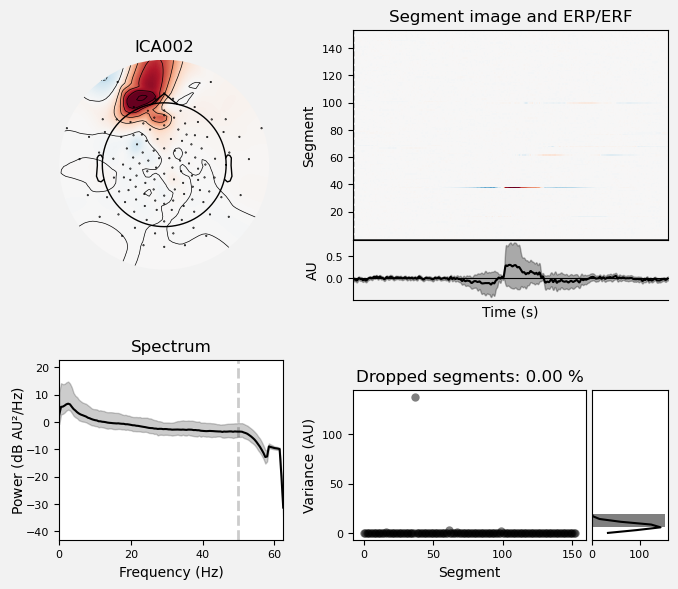

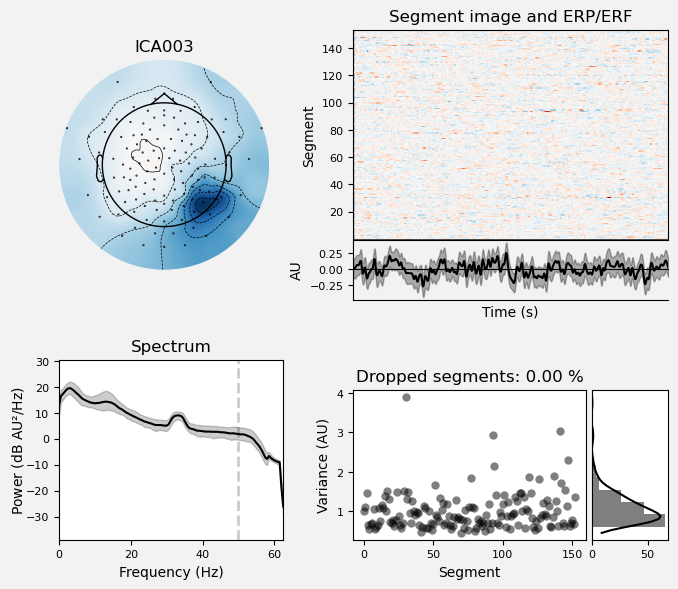

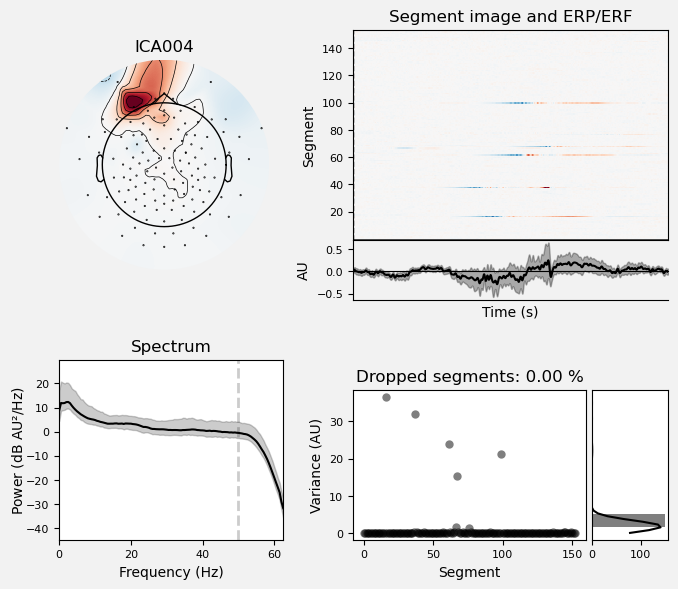

<RawEEGLAB | 0012_rest.fdt, 128 x 307140 (307.1 s), ~300.1 MB, data loaded>

In [10]:

signalfloweeg.preprocessing.ica.show_ICA(ica_EEG,ICAData)


In [ ]:
import signalfloweeg 
import mne 

filepath = "/home/cbl/Desktop/Test_Data/0012_rest.set"
EEG = mne.io.read_raw_eeglab(filepath)
EEG.compute_psd().plot()

In [ ]:

filtered_eeg = signalfloweeg.preprocessing.filtering.bandpass_filter(EEG, 2, 50)
filtered_eeg = signalfloweeg.preprocessing.filtering.notch_filter(filtered_eeg, 60)
resampled_eeg = signalfloweeg.preprocessing.resampling.resample(filtered_eeg, 500)
resampled_eeg.compute_psd().plot()
# segment_EEG = signalfloweeg.preprocessing.segment_rejection.manual_segment_rejection(filtered_eeg)
